In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
df = sns.load_dataset('diamonds')

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Paramètres les plus importants définissant le prix : carat et taille

In [12]:
df["Volume"] = df["x"]*df["y"]*df["z"]

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [14]:
df.drop(columns=["x", "y", "z", "cut", "color", "table", "clarity", "depth"], inplace=True, axis=1)

In [15]:
df.head()

,carat,price,Volume
0,0.23,326,38.202030
1,0.21,326,34.505856
2,0.23,327,38.076885
3,0.29,334,46.724580
4,0.31,335,51.917250


<AxesSubplot:>

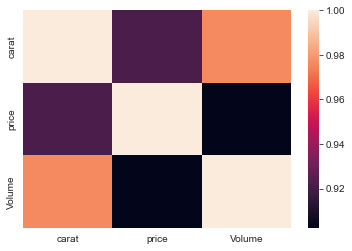

In [16]:
sns.heatmap(df.corr())

La variable principale semblant avoir le plus de poids est le carat. On va donc la prendre comme varaible de fonction pour notre regression linéaire.

In [17]:
X = df['carat']
Y = df['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
X_train
y_train

29477     702
52542    2532
8725      586
15577    6249
19651    8263
         ... 
16304    6525
79        554
12119    5167
14147    5740
38408    1024
Name: price, Length: 37758, dtype: int64

In [20]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [21]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -2261.326594
carat    7771.692025
dtype: float64

In [22]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.146e+05
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:34:53   Log-Likelihood:            -3.3093e+05
No. Observations:               37758   AIC:                         6.619e+05
Df Residuals:                   37756   BIC:                         6.619e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2261.3266     15.596   -144.993      0.000   -2291.895   -2230.758
carat       7771.6920     16.776    463.264      0.000    7738.811    7804.573
==============================================================================
Omnibus:                     9677.606   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106731.259
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                      11.029   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

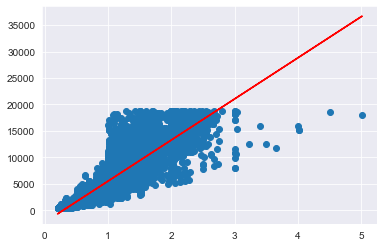

In [23]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, -2261 + 7772*X_train, 'r')
plt.show()

Analyse résiduelle

In [24]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\hugop\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


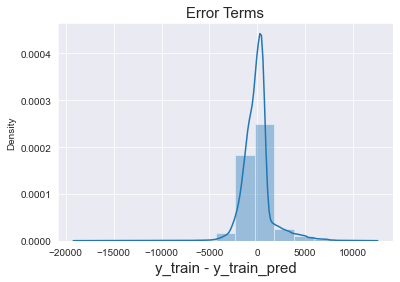

In [25]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

On obtient bien une courbe normale, de moyenne presque 0

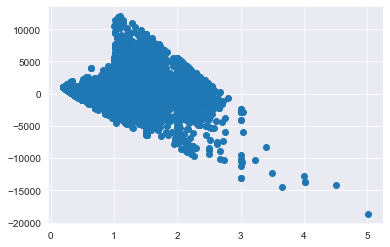

In [26]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

On observe une certaine tendance supplémentaire. Cela n'est pas réellement étonnant, on a observé par nos études précédentes que le volume de notre diamant avait un impact sur le prix de notre diamant. Il est ainsi utile d'effectuer une régression multilinéaire en prenant en compte le carat ET le volume.

Prédiction

In [27]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

52264    2168.537860
21073    6753.836155
42161    1702.236339
35974    1002.784057
7641     3956.027026
            ...     
10135    5510.365431
1637     3178.857824
43518    2479.405541
33364     925.067136
1319     5354.931590
Length: 16182, dtype: float64

In [28]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8467395108795196

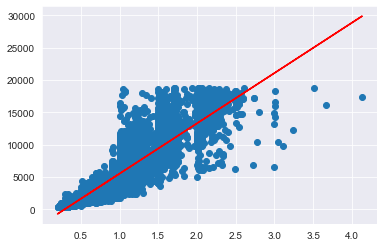

In [29]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()